In [0]:
## 선형회귀

# 데이터들 사이의 상관관계 또는 추이를 예측하거나, 대상 값 자체를
# 예측하는 지도학습 알고리즘

# 예를 들어, 방의 개수와 집값의 상관 관계 또는 과거 10년간의
# 영업 실적을 분석하여 미래의 영업 실적을 예측하는 것

# 하나의 종속변수와 하나 이상의 독립변수 간의 상관관계를 기본으로
# 하여 하나의 n차 선형방정식으로 변수 관계를 일반화하는 분석방법


# 하나의 독립변수를 통해 
# 종속변수 값을 잘 설명할 수 있으면 단순 선형회귀라 하고, 

# 하나 이상의 독립변수를 통해 
# 종속변수 값을 잘 설명할 수 있으면 다중 선형회귀라 함


## 선형성(Linearity)
# 두 변수의 관계가 하나의 직선의 형태로 
# 설명될 수 있는 관계를 지닌다는 것



## 회귀분석의 중요 개념

# 선형방정식 : 두 변수의 관계를 방정식으로 표현
# 기울기 : 독립변수가 종속변수에 얼마나 영향을 
#          주는지 그 크기와 방향을 파악
# 절편 : 회귀선을 얼마나 위/아래로 평행이동 시키는지 알 수 있음



## 선형회귀 기법

# 일반선형회귀 : 예측값과 실제값의 잔차제곱합 RSS 을
#                최소화하는 회귀계수를 구함, 규제 미적용

# 릿지 회귀 : 일반선형회귀에 L2 규제를 적용
#             즉, 큰 회귀계수의 수치를 감소시킴

# 라쏘 회귀 : 일반선형회귀에 L1 규제를 적용
#             즉, 작은 회귀계수의 수치를 0으로 만듬

# 엘라스틱 회귀 : 일반선형회귀에 L1, L2 규제를 적용

# 다양한 머신러닝 알고리즘을 이용.
# 교차검증 방식으로 모델을 훈련시키고 예측 정확도를 평가해 줌

import sklearn
import image
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix  
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits

# predictive modeling 계열 (의사결정나무, 랜덤포레스트, 로지스틱 회귀, Knearest 등) <- Kmeans 어따 빼먹음
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# 모델 검증 관련 (정확도)
from sklearn.metrics import accuracy_score

# preprocessing (전처리) 그룹
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder



# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False) 
# 바로 위 1줄이면 그 위위 2줄과 동일

from sklearn.base import BaseEstimator

from sklearn.metrics import confusion_matrix # 혼동행렬

# score류 (predictive modeling을 평가하는 지표)
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from  sklearn.metrics import f1_score # F1 스코어 (정밀도, 민감도 조화평균..)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# ROC

# Receiver Operation Characteristics Curve
# 수신자 판단 곡선

# 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
# 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용

# 특이도(FPR)가 변할 때 민감도가 어떻게 변하는지 알아보기 위한 곡선

# 환자 중 보균자p/정상인n 있는 경우
# 재현율 : 보균자를 보균자로 양성 판정
# 특이도 : 정상인을 정상인으로 음성 판정

# -_-;;; -------------------------------------------------------------------------------


# AUC 

# Area Under Curve
# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울수록 좋은 수치를 의미함

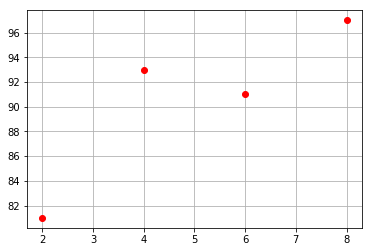

기울기 2.3
절편 79.0
예측값 [83.6, 88.2, 92.8, 97.4]


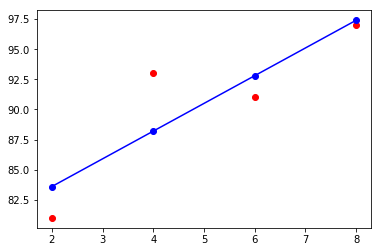

In [6]:
# ex) 공부한 시간 대비 성적 예측을 단순선형회귀로 풀어 봄

# time = 2, 4, 6, 8        (독립변수)
# jumsu = 81, 93, 91, 97   (종속변수)

# 선형방정식은 y = ax + b형태임
# 따라서, 기울기 a 와 절편 b를 구해야 함


# 독립변수와 종속변수의 관계를 그래프로 표현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

plt.plot(x, y, 'ro')
plt.grid(True)
plt.show()



# 회귀계수를 구하기 위해 다양한 방법을 
# 이용할 수 있는데 여기서는 평균제곱오차MES를 이용함

# 기울기 = 총합(x - x평균)(y - y평균) / 총합(x - x평균)^2

# 절편 = y평균 - (x평균 * 기울기)

x_mean = np.mean(x)
y_mean = np.mean(y)


divsor = sum([(i - x_mean) ** 2 for i in x])


def divtop(x, mx, y, my):
  sums = 0
  for i in range(len(x)):
    sums += (x[i] - mx) * (y[i] - my)
  return sums
  
dividen = divtop(x, x_mean, y, y_mean)

a = dividen / divsor
b = y_mean - (x_mean * a)

print('기울기', a)
print('절편', b)


# 예측값을 넣어 회귀선을 그려봄

z = []

for i in x:
  z.append(a*i + b)

print('예측값', z)

plt.plot(x, y, 'ro')
plt.plot(x, z, 'bo-')
plt.show()



In [0]:
## 평균제곱근 오차

# 최소제곱법을 이용해서 회귀직선을 그어 보았지만
# 다양한 상황에 적합한 직선을 긋기에는 부족

# 즉, 여러 개의 변수로 구성된 데이터에 대한 
# 회귀직선을 긋기에는 무리가 있음

# 따라서, 여러 독립변수로 구성된 데이터의 경우
# 임의의 선을 그린 후 이 선의 오차를 평가하고 조금씩
# 수정해 나가는 방법이 필요

# 주어진 선의 오차를 평가하는 방법 : 평균제곱근오차

# 최소제곱법에서는 공식을 이용해서 바로 기울기/절편을 계산
# 한편, 평균제곱근오차에서는 기울기와 절편에 아무값이나 대입하고 
# 오차를 구해서 이 오차를 최소화 하는 방식을 사용

# 오차 평가 방법RMSE
# (실제값 - 예측값)의 제곱합의 제곱근


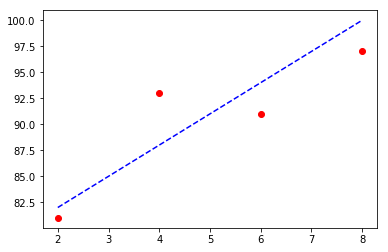

RMSE 3.3166247903554


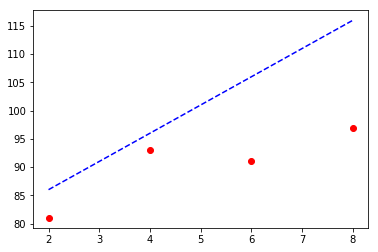

RMSE 12.449899597988733


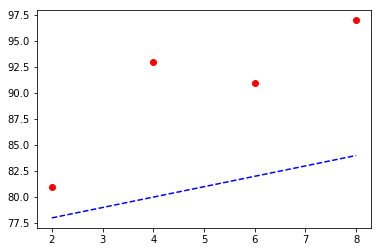

RMSE 10.344080432788601


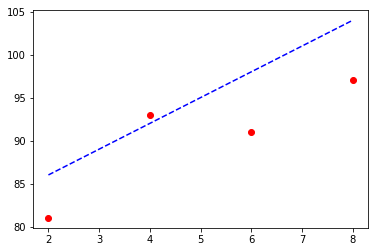

RMSE 5.5677643628300215


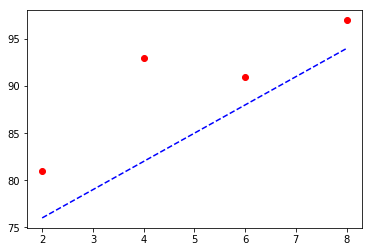

RMSE 6.4031242374328485
----------------------------------
pred = w * x + b
[ -40  -80 -120 -160]
----------------------------------
pred = w * x + b
[ -38  -76 -114 -152]
----------------------------------
pred = w * x + b
[ -36  -72 -108 -144]
----------------------------------
pred = w * x + b
[ -34  -68 -102 -136]
----------------------------------
pred = w * x + b
[ -32  -64  -96 -128]
----------------------------------
pred = w * x + b
[ -30  -60  -90 -120]
----------------------------------
pred = w * x + b
[ -28  -56  -84 -112]
----------------------------------
pred = w * x + b
[ -26  -52  -78 -104]
----------------------------------
pred = w * x + b
[-24 -48 -72 -96]
----------------------------------
pred = w * x + b
[-22 -44 -66 -88]
----------------------------------
pred = w * x + b
[-20 -40 -60 -80]
----------------------------------
pred = w * x + b
[-18 -36 -54 -72]
----------------------------------
pred = w * x + b
[-16 -32 -48 -64]
----------------------------------

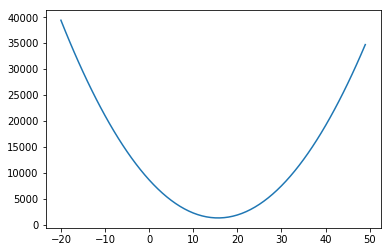

In [7]:
from sklearn.metrics import mean_squared_error


# 시도 1 : 기울기 = 3, 절편 = 76
a = 3; b = 76

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 2 : 기울기 = 5, 절편 = 76
a = 5; b = 76

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 3 : 기울기 = 1, 절편 = 76
a = 1; b = 76

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 4 : 기울기 = 3, 절편 = 80
a = 3; b = 80

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 5 : 기울기 = 3, 절편 = 70
a = 3; b = 70

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 따라서, 기울기가 커지면 오차가 커진다 ( 3.3 -> 12.4)
# 또한, 기울기가 작아지면 오차가 커진다 ( 3.3 -> 10.3)
# 즉, 기울기와 오차간의 상관관계가 존재



# 기울기와 오차간의 관계를 그래프로 그려봄
weights = []   # 기울기
loss = []      # 오차
b = 0          # 절편은 편의상 0으로 설정

for w in range(-20, 50):   # 기울기를 -20 ~ 50 으로 설정
  x = np.array([2, 4, 6, 8])
  y = np.array([91, 93, 91, 97])
  pred = w * x + b
  
  weights.append(w)
  loss.append(mean_squared_error(y, pred))
  print('----------------------------------')
  print('pred = w * x + b')
  print(pred)
  
plt.plot(weights, loss)
plt.show()
  
  
# 그래프에서 확인하듯이 기울기와 오차의 관계는 이차함수 형태임
# 오차가 가장 작은 부분은? => 그래프 하단의 볼록한 부분

# 기울기를 구하는 방법
# 임의의 점을 선택 > 미분 실시 > 기울기가 0인지 확인 
# => 기울기가 0일때까지 계속 반복 시행
# ==> 미분의 기울기를 이용한 경사하강법을 적용
 

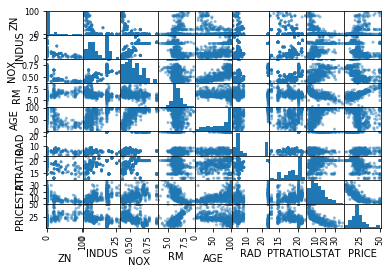

In [8]:
# 선형 회귀를 이용한 보스톤 집값 예측 
# 데이터 초기화 및 확인
  
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

#print(boston.target)

df['PRICE'] = boston.target

df.head()
df.describe()
  
  
# 산점도 행렬
from pandas.plotting import scatter_matrix  
from sklearn.datasets import load_boston

# ZN, INDUS, NOX, RM, AGE, RAD, PTRATIO, LSTAT, PRICE
smdf = df.iloc[:, [1, 2, 4, 5, 6, 8, 10, 12, 13]]

#print(smdf)

scatter_matrix(smdf)
plt.show()




0
0
-----------------------------
0
1
-----------------------------
0
2
-----------------------------
0
3
-----------------------------
1
0
-----------------------------
1
1
-----------------------------
1
2
-----------------------------
1
3
-----------------------------


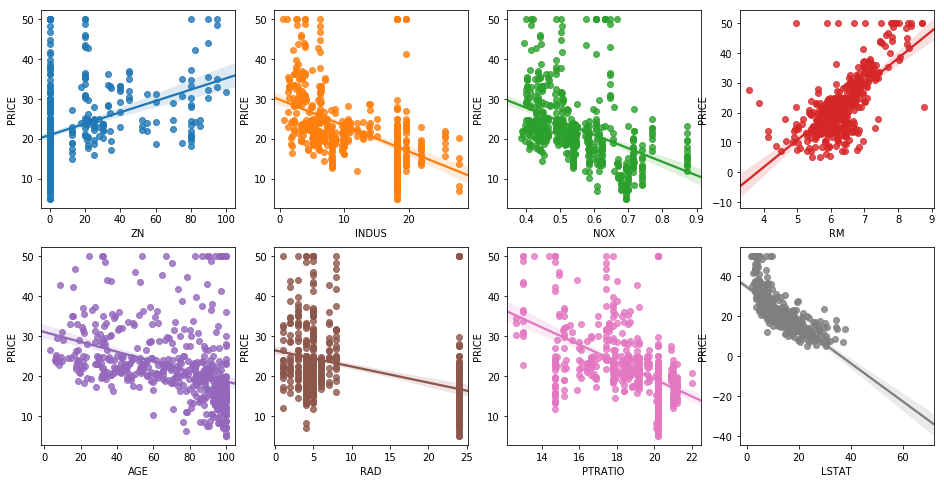

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 8), 
                       ncols = 4, nrows=2)

features = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE','RAD', 'PTRATIO', 'LSTAT']


for i, feature in enumerate(features):
  #print(i)
  #print(feature)
  row = int(i/4)
  col = i % 4
  sns.regplot(x=feature, y='PRICE', 
              data=df, ax=ax[row][col]) #이건 seabor의 regplot 그래프 그리기 로직이므로, 중요치 않으니 일단 패스
  print(row)
  print(col)
  print('-----------------------------')

In [10]:
# 회귀분석 실시
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix  
from sklearn.datasets import load_boston


X_train, X_test, y_train, y_test = \
train_test_split(boston.data, boston.target, \
                 test_size=0.2, random_state=1907021630)
  
lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)


# 회귀계수 확인 및 회귀모형 평가
print('회귀계수', np.round(lr.coef_, 2))
print('절편', np.round(lr.intercept_, 2))

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('MSE 및 RMSE', np.round(mse, 3), np.round(rmse, 3))

r2 = np.round(r2_score(y_test, pred), 3)
print('R^2', r2)



# 회귀평가 vs 분류평가
#             회귀             분류
# 종속변수y   연속형           범주형
# 손실함수    OLS,MSE          최대우도, 엔트로피 
# 평가        MSE/RMSE/R^2     정확도/정밀도/재현율/F1/ROC/AUC


회귀계수 [-1.000e-01  4.000e-02  1.000e-02  3.330e+00 -1.664e+01  3.770e+00
 -1.000e-02 -1.420e+00  3.200e-01 -1.000e-02 -9.500e-01  1.000e-02
 -5.000e-01]
절편 36.42
MSE 및 RMSE 23.101 4.806
R^2 0.731


In [18]:
# 보스톤 집값 데이터를 이용해서
# 10회의 교차검증 회귀분석 실시시 R^2은 얼마인가?

boston = load_boston()
lr = LinearRegression()

r2 = cross_val_score(lr, boston.data, boston.target,
               cv=10, scoring='r2') #10번 교차검증
nmse = cross_val_score(lr, boston.data, boston.target,
               cv=10, scoring='neg_mean_squared_error') #10번 교차검증
# scoring : accuracy, precision, recall, roc_auc

rmse = np.sqrt(-1 * scores)


# cross_val_score로 반한된 값은 음수이므로 부호 변환

print('교차검증 결과 : RMSE => ', np.mean(rmse))
print('교차검증 결과 : R2 => ', np.mean(r2)) # r2 엉망 -_-;;

교차검증 결과 : RMSE =>  5.18084567934026
교차검증 결과 : R2 =>  0.20252899006055863


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
distance        15 non-null int64
deliverytime    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes
----------------------------
   distance  deliverytime
0       100            20
1       150            24
2       300            36
3       400            47
4       130            22


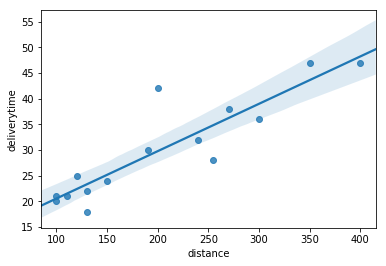

In [25]:
# 배달정보가 담긴 데이터가 다음과 같을때
# 회귀분석을 이용해서 회귀계수/R^2를 구하시오

import seaborn as sns

baedal = pd.read_csv('delivery.txt')

baedal.info()
baedal.describe()
print('----------------------------')
print(baedal.head())

sns.regplot(x='distance', y='deliverytime', data=baedal) # 간단한 회귀 그래프
plt.show()

In [36]:
# 회귀분석 실시

X = baedal['distance']
y = baedal['deliverytime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1907031045)

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 회귀계수 확인 및 회귀모형 평가
print('회귀계수: 기울기', lr.coef_)
print('회귀계수: 절편', lr.intercept_)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE', np.sqrt(mse))
print('R^2', r2)

# 에러나는 이유는, 임의로 데이터 만들어서 안 먹히는거. ===> 넘파일 배열 형태로 되어 있어야 함 -_-;; // 판다스로 읽어들여 데이터프레임 형태로 되어 있기 때문.
# => numpy array 형태로 바꿔줘야! 하기 참조

ValueError: ignored

In [41]:
# 회귀분석 실시

X = np.array(baedal['distance']).reshape(-1,1) # reshape 해줘야 -_-;; 행을 열로... 1열의 2차원 데이터로 -_-;;
y = np.array(baedal['deliverytime']).reshape(-1,1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1907031045)

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 회귀계수 확인 및 회귀모형 평가
print('회귀계수: 기울기', lr.coef_)
print('회귀계수: 절편', lr.intercept_)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE', np.sqrt(mse))
print('R^2', r2)

회귀계수: 기울기 [[0.09415694]]
회귀계수: 절편 [10.09529604]
RMSE 7.567165245784617
R^2 0.5487233724053457


In [42]:

X = np.array(baedal['distance']) # reshape 해줘야 -_-;; 행을 열로...
y = np.array(baedal['deliverytime'])

print(X)
print(y)

[100 150 300 400 130 240 350 200 100 110 190 120 130 270 255]
[20 24 36 47 22 32 47 42 21 21 30 25 18 38 28]


In [45]:
# 예측하기 - 배달거리 200m 일 때 배달시간은?

data = np.array([[200]])
print(lr.predict(data))

[[28.92668341]]
